In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
import pickle
#how to read
fileObj = open('data/r76-rawpulse-readcheck.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
print(exampleObj)

                                                                    Z1  \
                                                                    QI   
72208302118 3400634  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3400636  [65532, 65532, 65532, 65532, 65532, 65532, 655...   

                                                                        \
                                                                    QO   
72208302118 3400634  [41554, 41547, 41545, 41528, 41542, 41529, 415...   
            3400636  [41527, 41509, 41558, 41528, 41524, 41511, 415...   

                                                                        \
                                                                    PA   
72208302118 3400634  [3110, 3106, 3106, 3107, 3121, 3123, 3119, 312...   
            3400636  [3066, 3066, 3065, 3066, 3067, 3066, 3066, 306...   

                                                                        \
                                   

In [3]:
import statistics as st
def isRailed(v):
    if(np.isnan(v).any()):
        return True
    if(st.mode(v)==0):
        return True
    return False

In [5]:
import singularity_pulseSave as sps

pulse_struct = sps.parseEventList('../coin_analysis/data/numbertest.txt')

   SeriesNumber  EventNumber
0   72208302118      3400634
1   72208302118      3400636
[72208302118]
[3400634 3400636]
{'07220830_2118': array([3400634, 3400636])}


In [6]:
#72208301829
#550152
def getPTPulse(pulses,series=72208301829,ev=550152,chan=[('Z1','PA'),('Z1','PB'),('Z1','PC'),('Z3','PB'),('Z3','PC'),('Z3','PD')]):
    ptpulse=[]
    ccount=0
    for c in chan:
        #print(c[0])
        pulse = pulses[c[0]][c[1]][series,ev]
        if(isRailed(pulse)):
            continue
        mean = np.mean(pulse[100:])
        #print(mean)
        pulse = pulse-mean
        #print(pulse)
        #print(np.size(ptpulse))
        if(ccount==0):
            ptpulse=pulse
        else:
            ptpulse+=pulse
        ccount+=1

    #print(ptpulse)
    return ptpulse

72208302118
3400634
[3110 3106 3106 ... 3178 3176 3178]


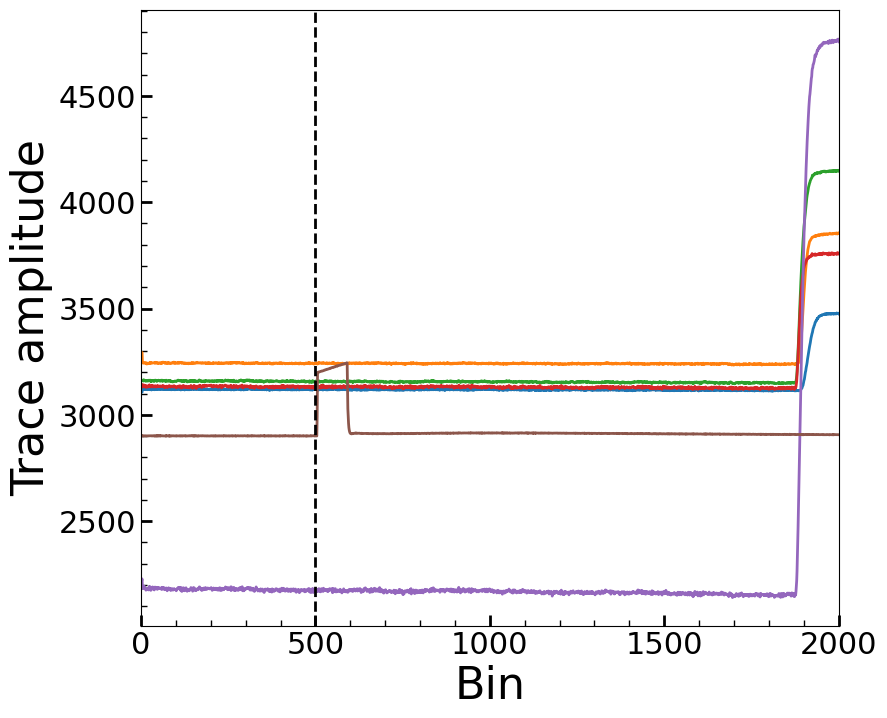

72208302118
3400636
[3066 3066 3065 ... 3063 3064 3064]


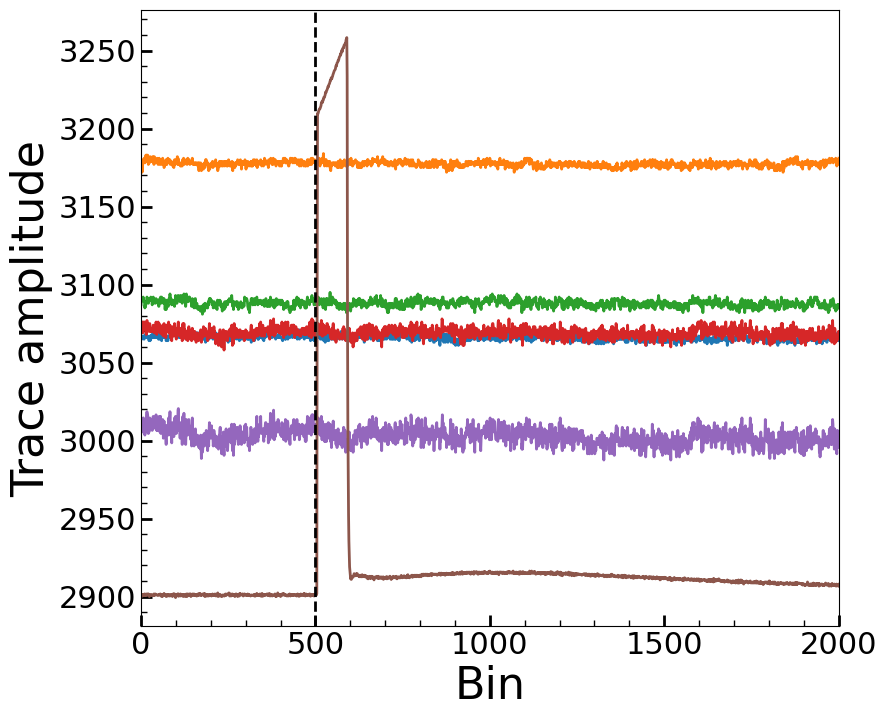

In [7]:
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      print(ser)
      print(ev)
      fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
      ax1 = axes
      print(exampleObj['Z1']['PA'][ser,ev])
      shownpulses=0

      #plt.subplot(8,12)
      if(not isRailed(exampleObj['Z1']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PA'][ser,ev]) # index 0 corresponds to first event
      if(not isRailed(exampleObj['Z1']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PB'][ser,ev])
      if(not isRailed(exampleObj['Z1']['PC'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PC'][ser,ev])
      if(not isRailed(exampleObj['Z3']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PB'][ser,ev]) # index 0 corresponds to first event
      if(not isRailed(exampleObj['Z3']['PC'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PC'][ser,ev])
      if(not isRailed(exampleObj['Z3']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PD'][ser,ev])

      if(shownpulses>0):
        ax1.plot(getPTPulse(exampleObj,ser,ev)+3000)

      #ax1.plot(exampleObj['Z4']['PA'][ser,ev]-5000)
      ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
      #plt.title('PA')
      ax1.set_xlim(0,2000)
      ax1.set_xlabel('Bin')
      ax1.set_ylabel('Trace amplitude')
      plt.axvline(x=500,color='k',linestyle="--")

      #plt.suptitle('Event 0 on Z1 PA Channels')
      if(shownpulses>0):
        plt.show()